<a href="https://colab.research.google.com/github/enase-elhaj/Library-Management-System/blob/master/JCB704_MNIST_resized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries.
!pip install imbalanced-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [4]:
from google.colab import files

# Optional: You can skip this step if you are running the code on your own
# machine
uploaded = files.upload('JCB704_MNIST_resized')

Saving JCB704_MNIST_resized.csv to JCB704_MNIST_resized/JCB704_MNIST_resized.csv


In [5]:
data_train = pd.read_csv('JCB704_MNIST_resized.csv')
# Begin by familiarizing yourself with the dataset.
print("First five rows of the training data:")
print(data_train.head())


First five rows of the training data:
     0    1    2    3    4    5    6    7    8    9  ...       187       188  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.000000   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.000000   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000123  0.000073   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000002  0.010165   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.000000   

        189           190  191  192  193  194  195  labels  
0  0.000000  0.000000e+00  0.0  0.0  0.0  0.0  0.0       1  
1  0.000000  0.000000e+00  0.0  0.0  0.0  0.0  0.0       1  
2  0.000014  2.783140e-07  0.0  0.0  0.0  0.0  0.0       1  
3  0.033733  1.094800e-03  0.0  0.0  0.0  0.0  0.0       0  
4  0.000000  0.000000e+00  0.0  0.0  0.0  0.0  0.0       0  

[5 rows x 197 columns]


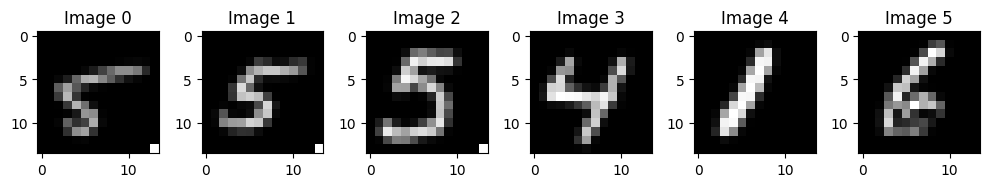

In [6]:
# Visualize some images to verify the correctness of the reshaping process.
num_images = 6
plt.figure(figsize=(10, 4))
# Create a new DataFrame by dropping the first column of data_train
toprint = data_train.drop(data_train.columns[0], axis=1)
toprint = pd.DataFrame(toprint)
for i in range(num_images):
    plt.subplot(2, num_images, i + 1)
    plt.imshow(toprint.iloc[i].values.reshape(14, 14), cmap='gray')
    plt.title(f"Image {i}")

plt.tight_layout()
plt.show()

In [7]:
# Do we have an imbalance?
label_counts = data_train['labels'].value_counts()
print(label_counts)

labels
1    5421
0    5421
Name: count, dtype: int64


In [8]:
# Splitting the dataset into features and target variable
X = data_train.drop('labels', axis=1).values
y = data_train['labels'].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Logistic Regression AUC: 0.9725304999370785
Decision Tree AUC: 0.9299173177061191


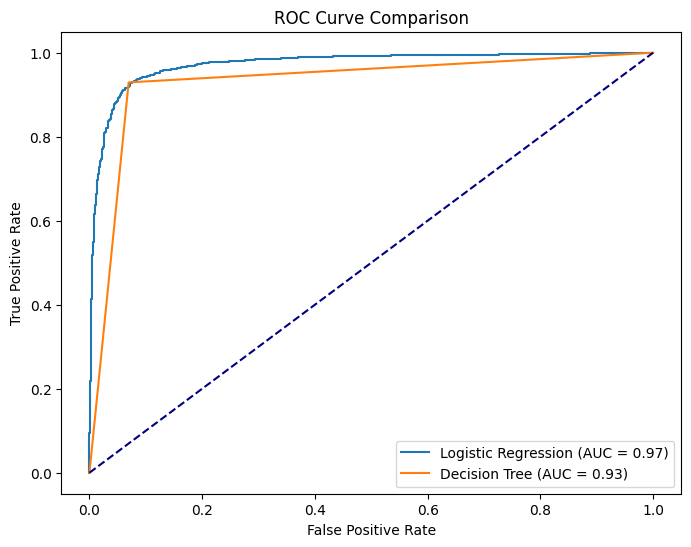

In [9]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict_proba(X_test)[:, 1]
log_reg_auc = roc_auc_score(y_test, log_reg_pred)
print(f"Logistic Regression AUC: {log_reg_auc}")

# Decision Tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
dec_tree_pred = dec_tree.predict_proba(X_test)[:, 1]
dec_tree_auc = roc_auc_score(y_test, dec_tree_pred)
print(f"Decision Tree AUC: {dec_tree_auc}")

# Calculate False Positive Rate and True Positive Rate for both models
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg_pred)
fpr_dec, tpr_dec, _ = roc_curve(y_test, dec_tree_pred)

# Plotting the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {log_reg_auc:.2f})')
plt.plot(fpr_dec, tpr_dec, label=f'Decision Tree (AUC = {dec_tree_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network AUC: 0.989238717489125


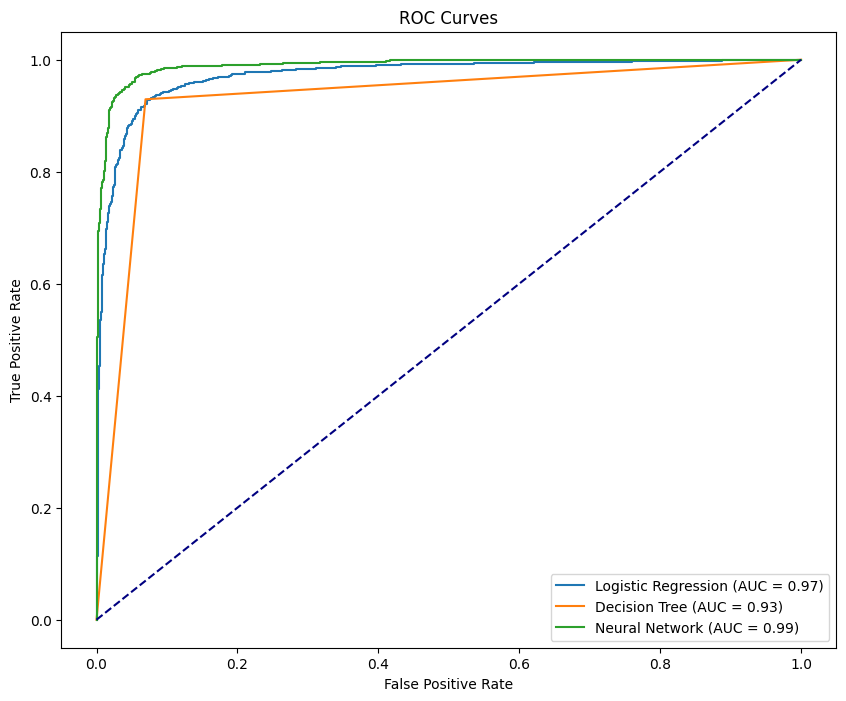

In [10]:
# Define a simple neural network for binary classification
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Predict probabilities
nn_pred = model.predict(X_test).ravel()

# Calculate AUC
nn_auc = roc_auc_score(y_test, nn_pred)
print(f"Neural Network AUC: {nn_auc}")

# Calculate False Positive Rate and True Positive Rate for the neural network
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_pred)

# Now, let's plot the ROC curves for all three models
plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {log_reg_auc:.2f})')
plt.plot(fpr_dec, tpr_dec, label=f'Decision Tree (AUC = {dec_tree_auc:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {nn_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


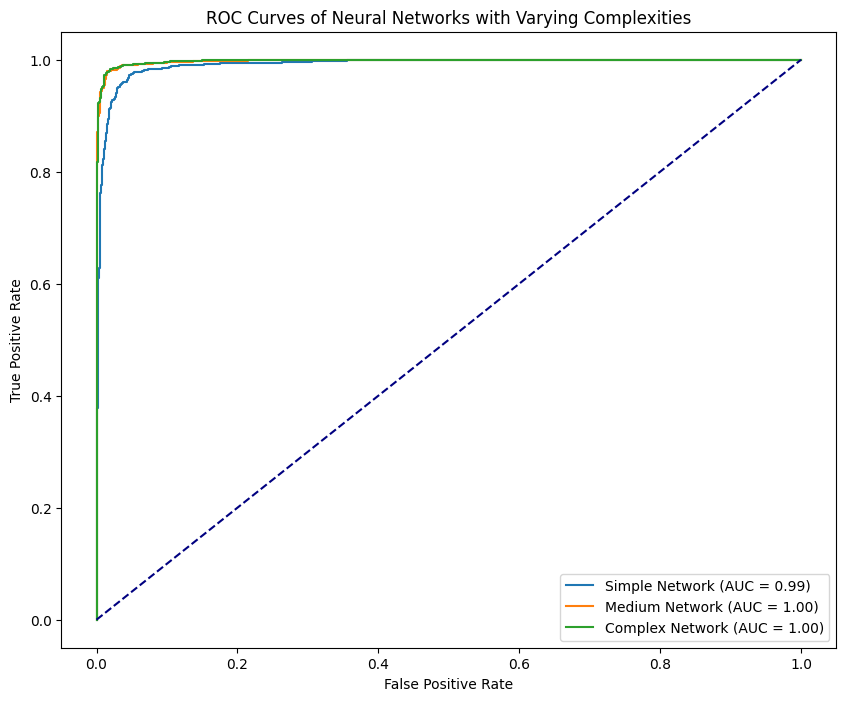

In [11]:

# Define the three models
models = {
    "Simple": tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    "Medium": tf.keras.models.Sequential([
        tf.keras.layers.Dense(50, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(30, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    "Complex": tf.keras.models.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(80, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
}

# Compile and train the models
for name, model in models.items():
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Predict and calculate AUC, FPR, TPR for each model
auc_scores = {}
roc_curves = {}
for name, model in models.items():
    predictions = model.predict(X_test).ravel()
    auc_scores[name] = roc_auc_score(y_test, predictions)
    fpr, tpr, _ = roc_curve(y_test, predictions)
    roc_curves[name] = (fpr, tpr)

# Plotting the ROC curves
plt.figure(figsize=(10, 8))
for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{name} Network (AUC = {auc_scores[name]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of Neural Networks with Varying Complexities')
plt.legend(loc='lower right')
plt.show()